In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
from sklearn.datasets  import make_blobs,make_circles
from sklearn import datasets
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()

# M칠todos de proyecci칩n

Las estrag칤as de proyecci칩n son utilizadas usualmente para reducir la dimensionalidad de los datos. El objetivo de la proyecci칩n es representar los elementos de datos de entrada en un espacio de dimensiones m치s peque침as de tal manera que ciertas propiedades de la estructura del conjunto de datos se conserven lo m치s fielmente posible. La proyecci칩n se puede utilizar para visualizar el conjunto de datos si se elige una dimensionalidad de salida suficientemente peque침a. En este notebook revisaremos tres de ellos as칤 como algunos conceptos de algebr치 lineal necesarios. 

##  Espacios vectoriales
 
Un **espacio vectorial** en su definici칩n abstracta: es un estructura algrebraica creada a partir de un conjunto $V$ (a cuyos elementos  llamanos **vectores**) y un campo $K$ (a sus elementos los llamamos **escalares**) sobre los cuales se definen las operaciones de suma (sobre los elemenos de $V$) y multiplicaci칩n entre los elementos de $V$ y $K$ que  cumplen las siguientes propiedades:

**Suma**
Dados $X,Y,Z \in V$ 
1. La suma es cerrada: $ X + Y \in V$
2. Comutatividad: $ X + Y = Y + X$
3. Asociatividad: $ X +(Y + Z) = (X + Y) + Z $
4. Existencia de neutro aditivo: existe $ 0 \in V$ tal que para todo $X \in V$ satisface $ X + 0 = 0 + X = X$
5. Existencia de inverso aditivo: Para todo $X \in V$ existe un elemento $-X \in V$ tal que $X + (-X)=(-X) + X=0$

**Multiplicaci칩n por un escalar**
Dados $X,Y \in V$ y $r,s \in K$
1. La multiplicaci칩n por un escalar es cerrada: $rX \in V$
2. Asociatividad: $r(sX)=(rs)X$
3. Distributividad en la suma escalar: (r+s)X=rX+sX
4. Distributividad en la suma vectorial: r(X+Y)=rX+rY
5. Existencia de neutro multiplicativo: existe $ 1 \in K$ tal que para todo $X\in V$ satisface $1X=X$  

La intenci칩n de esta definici칩n abstracta es presentar las propiedades y operaciones b치sicas que necesitamos asociar a un conjunto para utilizar las herramientas propias del 치lgebra lineal y el an치lisis matem치tico en su estudio y aplicaciones, sin embargo, es posible que esta definici칩n este muy alejada del concepto m치s intuitivo que se tiene de **vector** o **espacio** que seguramente nos presentaron en alg칰n curso previo de f칤sica o geometr칤a. 
La idea m치s popular del concepto de **vector** que probablemente manejamos es la proveniente de la fisica donde **se define como el segmento de una recta, el cual se encuentra situado en el espacio de un plano ya sea bidimensional o tridimensional** y se utiliza para representar alguna **propiedad f칤sica** que tenga  **magnitud** y **direcci칩n** c칩mo por ejemplo la velocidad o la fuerza. Recordemos un par de ejemplos:

|Ejemplo|Diagrama de cuerpo libre |
|----------|----------|
|Tensi칩n sobre cuerdas $T_1$ y $T_2$|Representaci칩n vectorial|
|<img src="https://cdn.kastatic.org/ka-perseus-images/a3197a5ce184666f657e66dac0559d185a2574f4.svg" alt="drawing" width="80%"/>|<img src="https://cdn.kastatic.org/ka-perseus-images/b2f5a9b54bb74cddd67e57466fedfade53611d3d.svg" alt="drawing" width="80%"/>|
|Ley de Coulomb: Fuerza que ejercen las cargas $B$ y $C$ sobre $A$|Representaci칩n vectorial|
|<img src="https://lh3.googleusercontent.com/fg2ZMyX2xwpTQaemxx2f1e6EkoBDTg833wQbxqMYaYDhQnO_u_7eD6C7xSQY7JkcdtCB4aX_4WGzhgb8j9uCgV37A_CaL7sZr_R241eVoqgb7jMBRr-qckowp7UqL6M61JnAbYgz" width="80%" />| <img  src="https://lh5.googleusercontent.com/1-y8K96DvVLyEeEE5ZZSMURVgk04zuFRKgTWOObekQPvZb3rdXaYwTRtzPnpBZip47TjCjTtZI_lufia6tVD2rGZUc-ZvrNo-_YprIZzchnUt9OT-FhNq7Y1ksvAnhkFq7LK-nJ8" width="80%"/> |

En los ejemplos anteriores podemos resaltar varios elementos que nos ayudaran a entender mejor el concepto de espacio vectorial.

1. Pertenecen a disciplinas de la f칤sisca distintas, el primero es un problema de mec치nica y el segundo es un problemo de de Electromagnetismo sin embargo la herramienta matem치tica (un diagrama de cuerpo libre) utilizada para abordar ambos problemas es la misma.
2. Todas la operaciones y medidas que utilizan estos problemas son las correspondientes a los n칰meros reales ${\Bbb R}$ y al plano cartesiano ${\Bbb R}^2$
3. En ambos problemas estamos interesados en calcular una fuerza o fuerzas y para ello utilizamos sumas de vectores, es decir se esta dotando de un significado f칤sico a la operaci칩n de la suma.
4. Las tensiones, cargas, distancias, longitudes involucrados al final nos hablan de propiedades (**caracteristicas**) f칤sicas del problema que se esta abordando.

Lo anterior da una intuici칩n muy buena pero insuficiente y tal vez incompleta de las bondades que obtenemos al lograr representar un fen칩meno utilizando vectores y tiene la desventaja de que estas ideas que involucran flechas y direcciones pueden generalizarse a lo m치s a ${\Bbb R}^3$ con lo que no podremos abordar problemas que involucren m치s de 3 dimensiones o caracteristicas.

Para rescatar estos cuatro elementos en un contexto m치s general por ejemplo en el espacio n-dimensional ${\Bbb R}^n$ necesitamos de esta definici칩n abstracta, note por ejemplo que la suma juega un papel central en la resoluci칩n de los dos ejemplos  anteriores. Se puede profundizar bastante en la teor칤a y consecuencias de esta definici칩n y en muchas ocasiones determinar si un conjunto particular con unas operaciones de suma y multiplicaci칩n definidas correctamente cumple las propiedades para ser un espacio vectorial puede ser un problema bastante interesante, sin embargo, en el contexto de este curso de visualizaci칩n centraremos nuestro inter칠s en ${\Bbb R}^n$ el espacio $n-dimensional$.


## Dos ejemplos importantes

### Ejemplo 1: El espacio vectorial ${\Bbb R}^n$

- **Definimos** ${\Bbb R}^n$ como el conjunto de secuencias ordenadas de n칰meros reales de tama침o $n$, es decir 
$$ {\Bbb R}^n = \{(x_1,x_2,\dots,x_n) | x_1,x_2,\dots,x_n \in \Bbb R \} $$
Note que para $n=1$ estamos hablando e los n칰meros reales, para $n=2$ estamos hablando del espacio bidimensional o plano cartesiano y para $n=3$ del espacio tridimensional.


- **Suma**: Dados $X,Y \in {\Bbb R}^n$ donde $X=(x_1,x_2,\dots,x_n)$ y $Y=(y_1,y_2,\dots,y_n)$ definimos la suma como sigue
$$X+Y=(x_1 + y_1,x_2 + y_2,\ldots,x_n+y_n )$$


- **Multiplicaci칩n por un escalar**: Dados $X \in {\Bbb R}^n$ y $r \in {\Bbb R}$ donde $X=(x_1,x_2,\dots,x_n)$ definimos la multiplicaci칩n como:
$$rX=(rx_1,rx_2,\dots,rx_n)$$

**${\Bbb R}^n$ con estas operaciones es un espacio vectorial**. Es decir satisface las 10 propiedades dadas en la definici칩n de espacio vectorial.

### Ejemplo 2: El espacio de funciones continuas $C(\Bbb R)$
- **Definimos** $C(\Bbb R)$ como el conjunto de funciones continuas con valores reales es decir:
$$ C(\Bbb R) = \{f:\Bbb R \to \Bbb R | \text{f es continua} \} $$


- **Suma**: Dados $f,g \in C({\Bbb R})$ donde $f:\Bbb R \to \Bbb R$ y $g:\Bbb R \to \Bbb R$ definimos la suma como sigue
$$f+g=f(x) + g(x) \text{ para todo } x \in \Bbb R $$


- **Multiplicaci칩n por un escalar**: Dados $f \in C({\Bbb R})$ y $r \in {\Bbb R}$ donde $f:\Bbb R \to \Bbb R$ definimos la multiplicaci칩n como:
$$rf=rf(x) \text{ para todo } x \in \Bbb R$$


**$C(\Bbb R)$ es un espacio vectorial**

La importancia de los dos espacios vectoriales anteriores radica en 

1. Son dos espaci칩s vectoriales bien conocidos sobre los cuales los conceptos de **magnitud** y **distancia o cercania** estan bien determinados y entendidos, m치s adelante profundizaremos m치s en estos conceptos.

2. En la pr치ctica para los estudiantes y entusiastas en las ciencias de datos en la mayor칤a de los casos lo primero que se hace es intentar representar las caracteristicas o variables de un problema mediante un conjunto de variables reales (vectores en ${\Bbb R}^n$) y en muchos casos incluso esta representaci칩n surge naturalmente.

## Espacios M칠tricos

Un espacio m칠trico es un conjuto de vectores que podr칤an haber sido obtenidos ya en forma de vectores de caracter칤sticas n칰mericas como  mediciones o estad칤sticas, pero en muchos casos necesitamos generarlos mediante t칠cnicas de transformaci칩n. En la siguiente unidad verememos algunos ejemplos en los que no partimos de datos n칰mericos, pero por ahora consideremos que nuestros datos ya est치n definidos en un espacio de vectorial.

Los datos que analizaremos estar치n dados en forma de una base de datos m칠trica ${\Bbb B}=\{X_1,...,X_m\}$ de dimensi칩n $n$, donde ${\Bbb B} \subset U$, es decir una muestra del universo de datos $U$. Cada $X_i \in {\Bbb B}$ est치 definida en $\mathbb{R}^n$  como un vector de $n$ dimensiones $\{x_1,x_2,\dots,x_m\}$.

Para nosotros es com칰n que comparemos dos objetos mediante el uso de un valor n칰merico u orden de comparaci칩n que puede ser cualitativo o cuantitativo.  Por ejemplo tener un ingreso medio, alto o bajo; la distancia entre dos sitios de inter칠s; la cantidad de tiempo que le dedicamos a distintas actividades. Tambi칠n es com칰n que utilicemos m치s de una valor a la vez.  

Cuando la estrutura de los datos es realivamente simple y los objetos son representados por pocos valores n칰mericos (i.e. dimesi칩n $n \leq 3$) es f치cil plasmar la relaci칩n entre los objetos de forma visual.

Por ejemplo considere los datos de las siguentes nubes de datos bidimensionales (i.e. para cada $X \in {\Bbb B}$ tenemo que $X_i=\{x_{i,1},x_{i,2} \}$):

In [2]:
def plot_scatters(X,y, clases=[]):
    if clases == []:
        clases=list(set(y))
    for l in set(y):
        idx=np.where(y==l)
        plt.scatter(X[:,0][idx],X[:,1][idx],c=f'C{l}', 
                label=clases[l], alpha=0.7)

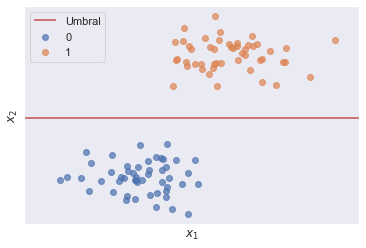

In [3]:
Bb,y=make_blobs(centers=2, n_features=2, random_state=2)
plt.hlines(-5.5,-5,5, colors='C3', label='Umbral')
plt.xlim(-5,5)
plt.xticks([])
plt.yticks([])
plt.ylabel('$x_2$')
plot_scatters(Bb,y)
plt.xlabel('$x_1$')
plt.legend();

En el ejemplo previo se puede observar visualmente que existen dos clases y que  podr칤amos separarlos mediante el uso del umbral definido por la l칤nea recta. A este tipo de problemas se dice que son linealmente separables. 

Desafortunadamente, no todos los datos son lineales, por ejemplo la siguiente los datos alineados en dos circulos conc칠ntricos:

[]

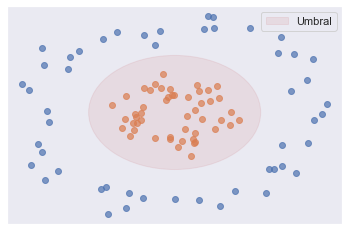

In [4]:
Bc,yc=make_circles(random_state=1,factor=.3, noise=.1)
fig, ax= plt.subplots()
for l in set(yc):
        idx=np.where(yc==l)
        ax.scatter(Bc[:,0][idx],Bc[:,1][idx], c=f"C{l}", alpha=0.7)
circ = plt.Circle((0, 0), 0.6, color='r', alpha=0.1)
ax.add_patch(circ)
ax.legend([circ], ['Umbral'])
ax.set_xticks([])
ax.set_yticks([])

En el caso anterior no es posisble poner un umbral o frontera lineal que separa de forma precisa los datos. Una opci칩n es  utilizar un umbral dispuesto en forma circular (lo cual es simple para un ser humano, pero tanto para un m칠todo de aprendizaje), con lo que tendr칤amos una frontera no lineal.  Otra opci칩n es hacer una proyeccci칩n en un nuevo espacio, usualmente en una dimensi칩n mayor a la actual, pero que permita visualizar la estructura de los datos de forma apropiada. 

En el ejemplo anterior podr칤amos transformar todos nuestros datos mediante el uso de la siguiente funci칩n:

$X^\prime_i=\{|x_{i,1}-\hat{x}_1|,|x_{i,2}-\hat{x}_2| \}$

donde $\hat{x}_j$ representa la media del valor de la caracter칤stica $x_j$. En nuestro ejemplo, los datos est치n distribuidos en torno al origen por lo que la $\hat{x}_j \approx 0$, por ello podemos reducir la funci칩n a:

$X_i=\{|x_{i,1}|,|x_{i,2}| \}$


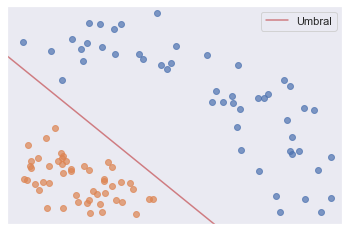

In [5]:
fig, ax= plt.subplots()
Bcn=np.abs(Bc) # Transformamos
for l in set(yc):
        idx=np.where(yc==l)
        ax.scatter(Bcn[:,0][idx],Bcn[:,1][idx], c=f"C{l}", alpha=0.7)
ax.plot([-0.1,0.7],[0.9,-0.1], c='C3',label='Umbral', alpha=0.7)
ax.set_xlim(-0.05,1.1)
ax.set_ylim(-0.05,1.1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend();

En el ejemplo anterior utilizamos la funcion $f(x_i,\hat{X})=\{|a_{i,1}-\hat{a}_1|,|a_{i,2}-\hat{a}_2| \}$  la cu치l es la funci칩n de distancia conocidad como `manhattan` o `city block`. 

## M칠tricas y similitudes

En matem치ticas, una  m칠trica o funci칩n de distancia es una funci칩n que define un valor de distancia entre un par de elementos/objetos definidos en un espacio m칠trico. La m칠trica induce una topolog칤a en espacio, en visualizaci칩n nos interesa utilizar la topolog칤a inducida para ganar entendimiento delos datos bajo an치lisis. 

Toda m칠trica $d$ satisfase  los siguientes tres axiomas:

- $d(X,Y)=0$ si y solo si $X=Y$
- $d(X,Y)=d(X,Y)$ simetria
- $d(X,Y)\leq d(X,Z) + d(X,Z)$ desigualdad del tri치ngulo

Por otro lado una funci칩n de  simulitud  cuantifica que tan parecidos son dos objetos. El concepto de `similitud` puede resultar  dif칤cil de entender, esto debido al hecho de que el t칠rmino puede tener diferentes interpretaci칩nes en de diferentes dominios y en ocasiones dentro del mismo dominio. Por ejemplo, los objetos  de la siguiete figura en t칠rminos de forma $c_1$ ser칤a similar a $c_2$, pero si lo ponemos en terminos de color lo ser칤a m치s similar a $s_1$

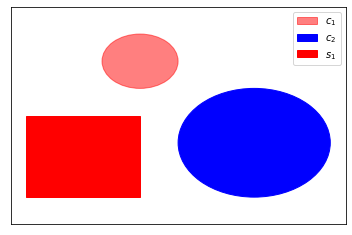

In [6]:
#fig, ax= plt.subplots()
#ax.set_xticks([])
#ax.set_yticks([])
#circ1 = plt.Circle((0.5, 2.5), 0.5, color='r',alpha=0.5)
#circ2 = plt.Circle((2, 1), 1, color='b')
#square1 = plt.Rectangle((-1,0),1.5,1.5,color='r')
#ax.add_patch(circ1)
#ax.add_patch(circ2)
#ax.add_patch(square1)
#ax.set_xlim(-1.2,3.2)
#ax.set_ylim(-0.5,3.5)
#ax.legend([circ1,circ2,square1], ['$c_1$','$c_2$','$s_1$']);

La siguiente tabla muestra algunas de las funciones de distancia y similitud m치s ampliamente utilizadas:

<table>
<tr><th>Funci칩n</th><th>Nombre</th><th>Dominio</th></tr>
 <tr><td>Distancia Manhattan</td><td>$$|X-Y|$$</td><td>Los reales</td></tr>
 <tr><td>Distancia Euclideana</td><td>$$\sqrt{(X-Y)^2}$$</td><td>Los reales</td></tr>
     <tr><td>Distancia Minkowski</td><td>$$((X-Y)^p)^{1/p}$$</td><td>Los reales</td></tr>
     <tr><td>Similaridad Coseno</td><td>$$\frac{X \cdot Y}{|X||Y|}$$</td><td>Los reales</td></tr>
     <tr><td>Similaridad de Jaccard</td>
      <td>$$\frac{|A \cap B|}{|A \cup B|}$$</td><td>Conjuntos</td></tr>
</table>

## Multidimensional scaling (MDS)
El escalado multidimensional (MDS) es una familia de t칠cnicas comunmente utilizadas para que para visualizar la similitud/distancia de datos en un espacio bi bidimensional. La idea b치sica es la similitud de dos objetos puede ser definida en terminos de la distancia que exhiben en el plano en dimensiones mas bajas (usualmente 2D o 3D). 

MDS nos permite transformar("proyectar") un conjunto de datos a dimensiones menores, esto mientras se  mantienen las mismas distancias entre los objetos del conjunto original. El hecho de que MDS mantenga las distancias permite que los patrones que emergen de los datos se preserven. Lo cual, en teor칤a nos permitir칤a hacer an치lis exploratorio en datos de menores dimensiones al conjunto original. 

Por ejemplo, si tenemos un conjunto de datos de 4 dimensiones y se desea visualizar en 2D, se aplicaria MDS para escalarlo a 2 dimensiones. Dado que las distancias entre objetos se mantiene en ls datos transformados, en caso de que hubiese una estructura de  grupos, estos persistirian  despu칠s del procedimiento de escalado y podr칤amos visualizarlos en 2D.

Sin embargo, es posible que nuevas coordenanas en la dimensi칩n inferior ya no tengan un significado implicito.

La presentaci칩n gr치fica de los datos proporcionada por MDS permite  explorar visualmente la estructura de los datos y hace posible detectar regularidades que podr칤an estar ocultas en matrices num칠ricas. Otra aplicaci칩n de MDS es aplicarlo a modelos de juicios de disimilitud. Por ejemplo, dados dos objetos de inter칠s, su disimilitud percibida puede explicarse como resultado de la `arim칠tica mental` que podr칤a ser ajustada a una funci칩n de distancia. Seg칰n este modelo, la mente genera una impresi칩n de disimilitud al agregar las diferencias percibidas de los dos objetos sobre sus propiedades.

### MDS como t칠cnica de exploraci칩n de datos

El an치lisis de datos exploratorio se utiliza para estudiar datos que no est치n definidos mediamte una teor칤a expl칤cita que predice sus magnitudes o patrones.  

Considere el siguiente ejemplo tomado de \[1\]. El Resumen estad칤stico de USA publicado en 1970, proporciona un resumen sobre la tasa de ocurrencia de diferentes delitos en los 50 de USA. Una pregunta de inter칠s ser칤a  hasta qu칠 punto se puede predecir una alta tasa de delitos de homicidio, por ejemplo, sabiendo que la tasa de delitos de robo con allanamiento de morada es alta.  Se puede obtener una respuesta parcial a esta pregunta calculando las correlaciones de las tasas de delincuencia. A continuaci칩n mostramos la tabla de correlaciones.

In [7]:
delitos=pd.read_csv('delitos.csv',sep=' ')
delitos

Crime  Murder  Rape  Robbery  Assault  Burglary  Larceny  AutoTheft
0     Murder    1.00  0.52     0.34     0.81      0.28     0.06       0.11
1       Rape    0.52  1.00     0.55     0.70      0.68     0.60       0.44
2    Robbery    0.34  0.55     1.00     0.56      0.62     0.44       0.62
3    Assault    0.81  0.70     0.56     1.00      0.52     0.32       0.33
4   Burglary    0.28  0.68     0.62     0.52      1.00     0.80       0.70
5    Larceny    0.06  0.60     0.44     0.32      0.80     1.00       0.55
6  AutoTheft    0.11  0.44     0.62     0.33      0.70     0.55       1.00

Pero incluso en una matriz de correlaci칩n tan peque침a, no es f치cil comprender la estructura de estos coeficientes. Esta tarea se simplifica mucho al representar las correlaciones en forma gr치fica, como en la siguiente figura.

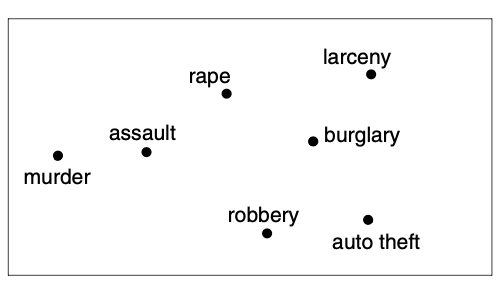

La imagen es una representaci칩n bidimensional obtenida con MDS, cada delito se muestra como un punto. Los puntos est치n dispuestos de tal manera que sus distancias preserven las correlaciones. Es decir, dos puntos est치n muy juntos (como *Muerder* y *Assault*) si sus correspondientes tasas de criminalidad est치n altamente correlacionadas. Por el contrario, dos puntos est치n muy separados si sus tasas de criminalidad no est치n tan estrechamente correlacionadas (como *Murder* y *Larceny*).

La calidad de una proyecci칩n puede puede comprobarse sin saber c칩mo se encontr칩. Todo lo que hay que hacer es medir las distancias entre los los puntos originales de $X$ y compararlas con los obtenidos por MDS.

En este curso, no trataremos a detalle el algoritmo, ya que nuestro prop칩sito es aplicarla an치lisis exploratorio utilizaremos la implementaci칩n MDS disponible en `sklearn.manifold`

### Ejemplo MDS - Iris

Mostraremos el funcionamiento de MDS mediante el uso del conjunto de datos en 4 dimensiones **Iris**.


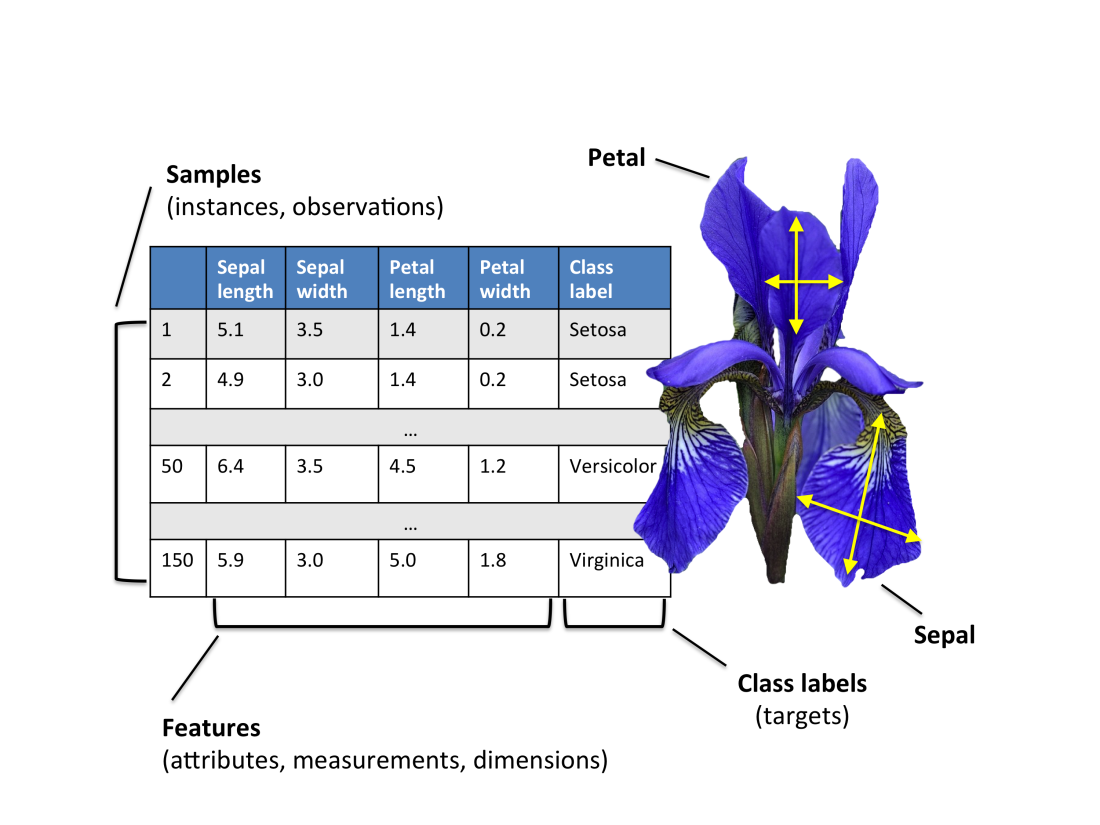

El dataset contiene los datos medidos para longitud y ancho de s칠palo y el p칠talo para un conjuto de 150 flores de iris de tres clases diferentes.

In [8]:
iris = datasets.load_iris()
Bi = iris.data  # los datos
yi = iris.target # las etiquetas
Bi.shape #  150 ejemplos en cuatro dimensiones

(150, 4)

Como a칰n son relativamente pocas caracter칤stica podemos hacer un scatter plot todos los pares. Por simplicidad ponemos todo el grid. Sin embargo, note que las partes superior e inferior de la diagonal son sim칠tricas, pero con los ejes transpuestos. A continuaci칩n dejamos el snipet de c칩digo para graficar los pares de coordenadas.

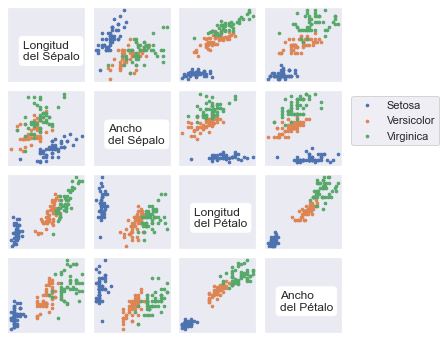

In [9]:
fig, axs=plt.subplots(nrows=4,ncols=4, figsize=(6,6))
features=[(0,'Longitud \ndel S칠palo'),(1,'Ancho \ndel S칠palo'),
          (2,'Longitud \ndel P칠talo'),(3,'Ancho \ndel P칠talo')]
clases=['Setosa','Versicolor','Virginica']
for i,t in features:
    for j,t in features:
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        if i==j:
            axs[i,j].annotate(t,(0.2,0.3),
                              bbox=dict(boxstyle="round", fc="w"))
            continue
        for l in set(yi):
            idx=np.where(yi==l)
            axs[i,j].scatter(Bi[idx][:,i],Bi[idx][:,j], c=f"C{l}",s=7, 
                             label=clases[l])
axs[1,3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(hspace=0.1, wspace=0.1)

Como podemos observar la clase `Setosa` se puede separar de las dos restantes  eligiendo  cualquier par de caracter칤sticas, por otro lado `Versicolor` y `Virginica` tienen un traslape independientemente del par de dimensiones que se elijan. Al aplicar MDS a este conjunto de datos deber칤a manternese una estructura similar.

Para aplicar MDS es primer paso es calcular la matriz de distancias $D$: dada una colecci칩n de objetos ${\Bbb B}$ tal que $N=|{\Bbb B}|$, la matriz de distancias es una matriz sim칠trica $N \times N$ que indica que tan  diferentes son todas las posibles parejas de objeto en la colecci칩n. Es decir cada elemento $d_{i,j} \in D$ est치 definidos como:

$d_{i,j}= f(X_i, X_j)$ 

donde $f$ puede ser cualquier funci칩n de distancia. Retomando el ejemplo de las flores de iris, La matriz de distancias ser칤a una de $150 \times 150$. La librer칤a `sklearn` cuenta una amplia librer칤a de funciones de distancia  `sklearn.metrics.pairwise_distances`. 

Pare nuestro ejemplo utilizaremos la distancia Euclideana, que es la que usa por defecto `sklearn.manifold.mds`.

In [10]:
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
# normalizamos para evitar que los rangos de las varibles influyan
# en la funci칩n de distancia
scaler=MinMaxScaler() 
Bin=scaler.fit_transform(Bi)

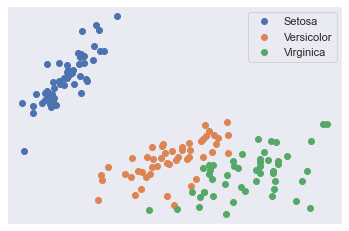

In [11]:
# solo especificamos la dimensi칩n y la semilla para reproducir
embedding = MDS(n_components=2, random_state=1)
Xit = embedding.fit_transform(Bin)# embebemos los datos en dimension 2
for l in set(yi):
    idx=np.where(yi==l)
    plt.scatter(Xit[:,0][idx],Xit[:,1][idx],c=f'C{l}', 
                label=clases[l])
plt.legend()
plt.xticks([])
plt.yticks([]);

Como podemos ver la figura resultante mantiene los el patr칩n en el que *Versicolor* y *Virginica* tienen un tralape, mietras quela clase *Setosa* est치 claramente separada. Puede probar cambiando `random_state` para observar como la estrutura se mantiene para ejecuciones con diferentes semillas.  Note que para el caso de este dataset tambi칠n es posible separar la mayor칤a de los datos mediante un umbral lineal, solo que requerir칤a m치s de una l칤nea de frontera (en general ser칤an necesarias el n칰mero de clases menos una frontera).

La principal desventaja con los m칠todos MDS no lineales es que son computacionalmente muy intensivos para grandes conjuntos de datos. Sin embargo, la complejidad computacional se puede reducir al restringir la atenci칩n a un subconjunto de las distancias entre los elementos de datos.

## An치lisis de Componentes Principales 

An치lisis de componentes principales (PCA) es una t칠cnica estad칤stica que se utiliza para reducir la dimensionalidad de los datos. PCA se basa en  la diagonalizaci칩n de la matriz de covarianza para un conjunto de datos $X$. La matriz de covarianza $\mathit{cov}(X)$
se define como:


$$\mathit{cov} (X) = \frac {1} {n} \Sigma_{i = 1}^n x_i x_i^{T}$$

asumiendo que $E(\bar{x})= \frac {1}{n}\Sigma_{i = 1}^n x_i = 0$. El problema se puede plantear de la siguiente manera:


$$\mathit{cov} \cdot V_j = \lambda V_j$$


donde $\lambda$ son los `eigenvalores` y $V$ son los `eigenvectores`. Al resolver la ecuaci칩n anterior se genera una base ortonormal para los vectores propios $V_j$ (es decir, componentes principales. Usando $V$ se puede producir una proyecci칩n en un espacio dimensional inferior $R^{m^\prime}$ (es decir, $m^\prime<m$) con la siguiente ecuaci칩n.


$$X^\prime = X \lbrack V_1, V_2, \dots, V_{m^\prime} \rbrack$$


## Ejemplos PCA



A continucaci칩n presentaremos un par de ejemplos ilustrativos sobre la implementaci칩n de esta t칠cnica en python tomados del libro [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook)

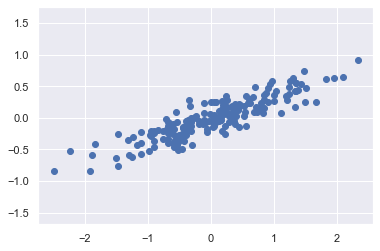

In [12]:
#####################################################
### Ejemplo PCA reducci칩n de dimensionalidad ########
####################################################

#Generamos un conjunto de datos en R^2 con una varianza dominante en una direcci칩n
rng = np.random.RandomState(1)
Bp = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(Bp[:, 0], Bp[:, 1])
plt.axis('equal');

En este ejemplo claramente existe una relaci칩n lineal entre los datos, utilizando PCA determinamos los vectores  洧녤洧녱 (componentes principales ) que determinan las direcciones en las que la varianza es m치xima y valores  洧랝洧녱  que nos dicen cuanta varianza se esta explicando y determinan la longitud al cuadrado de los componentes principales.

In [13]:
#Calculamos V_j y \lambda_j
pca = PCA(n_components=2)
pca.fit(Bp)

PCA(n_components=2)

In [14]:
# Para acceder los componentes principales utilizamos .components_
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [15]:
# Para acceder a los valores principales utilizamos 
print(pca.explained_variance_)

[0.7625315 0.0184779]


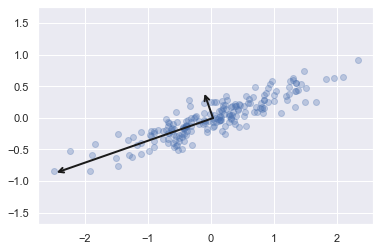

In [16]:
#Representamos los datos y los componentes principales en una misma grafica
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)
# plot data
plt.scatter(Bp[:, 0], Bp[:, 1], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Estos vectores representan los ejes principales de los datos, y la longitud del vector es una medida de que tan `importante` es ese eje para describir la distribuci칩n de los datos; m치s precisamente, es una medida de la varianza de los datos cuando se proyectan en ese eje. La proyecci칩n de cada punto de datos sobre los ejes principales son los "componentes principales" de los datos.

El uso de PCA para la reducci칩n de dimensionalidad implica volver cero uno o m치s de los componentes principales m치s peque침os, lo que da como resultado una proyecci칩n de menor dimensi칩n de los datos que conserva la varianza m치xima en los datos.

Siguiendo con nuestro  ejemplo de PCA como una transformaci칩n de reducci칩n de dimensionalidad:

In [17]:
pca = PCA(n_components=1)
pca.fit(Bp)
Bp_pca = pca.transform(Bp)
print("dimensi칩n original:   ", Bp.shape)
print("dimensi칩n reducida:", Bp_pca.shape)

dimensi칩n original:    (200, 2)
dimensi칩n reducida: (200, 1)


Los datos transformados se han reducido a una 칰nica dimensi칩n. Para comprender el efecto de esta reducci칩n de dimensionalidad, podemos realizar la transformaci칩n inversa de estos datos reducidos y trazarlos junto con los datos originales:

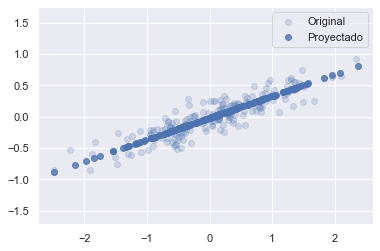

In [18]:
Bp_new = pca.inverse_transform(Bp_pca)
plt.scatter(Bp[:, 0], Bp[:, 1], alpha=0.2, label='Original')
plt.scatter(Bp_new[:, 0], Bp_new[:, 1], alpha=0.8,color='b',label='Proyectado')
plt.axis('equal');
plt.legend()

Los puntos m치s claros son los datos originales, mientras que los puntos oscuros son la versi칩n proyectada. Esto hace evidente lo que significa una reducci칩n de dimensionalidad de PCA: la informaci칩n a lo largo del eje o ejes principales menos importantes se elimina, dejando solo el (los) componente (s) de los datos con la varianza m치s alta.
La fracci칩n de varianza que se corta (proporcional a la extensi칩n de puntos alrededor de la l칤nea formada en esta figura) es aproximadamente una medida de cu치nta "informaci칩n" se descarta en esta reducci칩n de dimensionalidad.

Este conjunto de datos de dimensi칩n reducida es, en algunos sentidos, "lo suficientemente bueno" para codificar las relaciones m치s importantes entre los puntos: a pesar de reducir la dimensi칩n de los datos en un 70%, la relaci칩n general entre los puntos de datos se conserva en su mayor칤a.

### PCA para visualizaci칩n: d칤gitos escritos a mano

La utilidad de la reducci칩n de dimensionalidad puede no ser del todo evidente en solo dos dimensiones, pero se vuelve mucho m치s clara cuando se observan datos de alta dimensi칩n. Para ver esto, utilizaremos PCA para reducir la dimensionalidad  en los  datos de **d칤gitos** presentes en sklearn

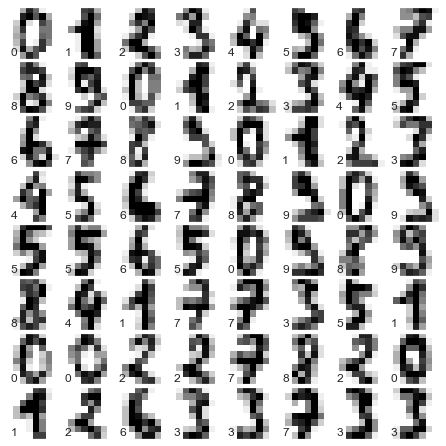

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Este conjuntos consta de $1797$ im치genes de d칤gitos escritos a mano cada una de tama침o $8\times8$ pixeles es decir cada imagen consta de $64$ pixeles y para este ejecicio representaremos cada imagen como un vector $\vec{X} \in \Bbb{R}^{64}$ estos vectores estan almacenados en **digits.data**

In [20]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


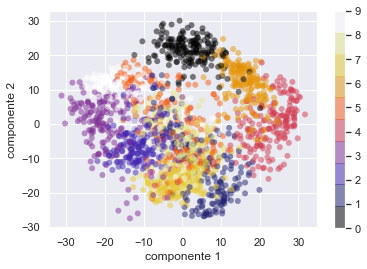

In [21]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('CMRmap', 10))
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.colorbar();

### Elegir el n칰mero de componentes
En la pr치ctica una parte importante del uso de PCA es la capacidad de elegir cu치ntos componentes se necesitan para describir los datos. Esto se puede determinar observando la raz칩n de varianza explicada acumulada en funci칩n del n칰mero de componentes:

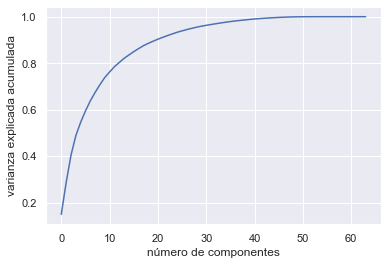

In [22]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n칰mero de componentes')
plt.ylabel('varianza explicada acumulada');

In [23]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

Esta curva cuantifica qu칠 parte de la varianza total de las 64 dimensiones est치 contenida dentro de los primeros  洧녜  componentes. Por ejemplo, vemos que con estos datos, los primeros 10 componentes contienen aproximadamente el 75% de la varianza, mientras que se necesita alrededor de 50 componentes para describir cerca del 100% de la varianza.

Aqu칤 vemos que nuestra proyecci칩n bidimensional pierde mucha informaci칩n (medida por la varianza explicada) y que necesitar칤amos alrededor de 20 componentes para explicar el 90% de la varianza. Mirar esta gr치fica para un conjunto de datos de dimensiones altas puede ayudarnos a comprender el nivel de redundancia presente en m칰ltiples observaciones.

### PCA como filtro de ruido

PCA tambi칠n se puede utilizar como m칠todo de filtrado para datos ruidosos. La idea es la siguiente: cualquier componente con una variaci칩n mucho mayor que el efecto del ruido no deber칤a verse afectado relativamente por el ruido. Por lo tanto, si reconstruimos los datos utilizando solo el subconjunto m치s grande de componentes principales, la se침al original debe mantener y eliminar el ruido.

Veamos c칩mo se ve esto con los datos de **d칤gitos**.  Primero trazaremos varios de los datos de entrada libres de ruido:

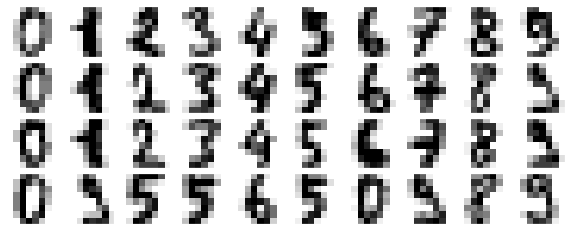

In [24]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Ahora agreguemos algo de ruido aleatorio para crear un conjunto de datos ruidoso y volvamos a gr치ficar:

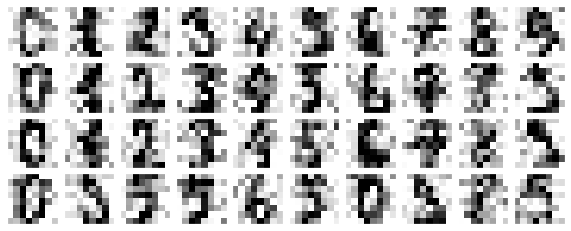

In [25]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

A simple vista, est치 claro que las im치genes contienen p칤xeles que son ruido. Hacemos PCA en los datos ruidosos, cuidando que la proyecci칩n conserve el 50% de la varianza:

In [26]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Aqu칤 el 50% de la varianza se explica con 12 componentes principales. Ahora calculamos estos componentes y luego usamos la inversa de la transformaci칩n para reconstruir los d칤gitos filtrados:

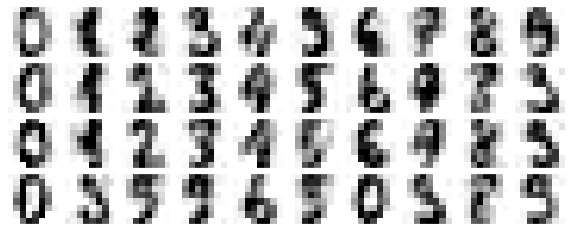

In [27]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Esta propiedad de preservaci칩n de se침al / filtrado de ruido hace que PCA sea una herramienta de selecci칩n de caracter칤sticas muy 칰til; por ejemplo, en lugar de entrenar un clasificador en datos de muy alta dimensi칩n, puede entrenar el clasificador en la representaci칩n de dimensiones inferiores, que autom치ticamente servir치 para filtrar el ruido aleatorio en los datos.

## Kernel PCA

La principal desventaja de PCA es que est치 dise침ado para trabajar con datos que presentan relaciones lineales. Una soluci칩n que permite usar PCA sobre datos que presentan relaciones no lineales es Kernel (KPCA). KPCA es una generalizaci칩n de PCA donde la matriz de covarianza se calcula a partir de un producto escalar que no es necesariamente lineal, es decir, la matriz $ \mathit{cov}(X)$ se reemplaza por una matriz $\mathit{cov}_{\phi}(X)$ definido como:


$$\mathit{cov}{\phi} = \frac{1}{n} \sum_{i=1}^n \phi(x_i) \phi(x_i)^{T}$$

donde $\phi$ es una funci칩n del n칰cleo tal que $\phi(x):R^m \to R^{p}$ para $p>m$. El objetivo de esta generalizaci칩n es mapear el conjunto de datos $X \subset R^m$ a un espacio de alta dimensi칩n donde los datos se vuelven linealmente separables. Una vez en un espacio lineal, se puede realizar el an치lisis de componentes principales.

KPCA es la soluci칩n para los eigenvalores y eigenvectores dados por la ecuaci칩n anterior (ver referencia [2]).

### Ejemplo KPCA

A continuaci칩n presentamos un ejemplo donde utilizamos 

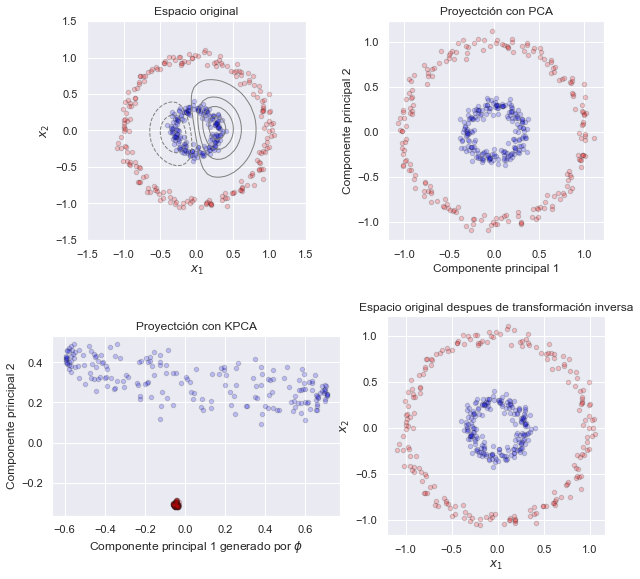

In [28]:
# Ejemplo KPCA
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure(figsize=[8.5,8.5])
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",alpha=0.2,
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",alpha=0.2,
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red", alpha=0.2,
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",alpha=0.2,
            s=20, edgecolor='k')
plt.title("Proyectci칩n con PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",alpha=0.2,
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",alpha=0.2,
            s=20, edgecolor='k')
plt.title("Proyectci칩n con KPCA")
plt.xlabel("Componente principal 1 generado por $\phi$")
plt.ylabel("Componente principal 2")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",alpha=0.2,
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",alpha=0.2,
            s=20, edgecolor='k')
plt.title("Espacio original despues de transformaci칩n inversa")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

plt.show()

Note  que a KPCA  se le debe proporcionar una funci칩n de kernel, la cual en terminos simples podemos considerar una funci칩n de similitud/distancia. 

Aunque las t칠cnicas de proyecci칩n son de utilidad para ganar entendimiento de los datos, no exisite una que funcione para todo los conjunto de datos. Por tanto, el cient칤fico de datos debe explorar varias estrateg칤as y combinarla con el conocimiento del dominio y otr치s t칠cnicas estad칤sticas y de aprendizaje.

# Actividad

<div class="alert alert-success">
    <ol>
    <li>Investigar sobre $t$-SNE y/o SVD (ver [5,6]) su funcionamiento y sus implementaciones existentes, esto para incluirlas como una alternativa mas para proyecci칩n de datos de alta dimensi칩n. </li>
    <li>Determine si es posible encontrar una estructura en los datos del contenidos en <b>datos2.csv.zip</b>. 
        <ul>
            <li>Puede obtener toda la matriz de datos como:
                <pre>data=pd.read_csv('datos2.csv').values[1:,1:]</pre>
                omitimos el encabezado y la primera columna que contiene el identificador de cada objeto en la colecci칩n
            </li>
            <li>Describa los datos</li>
            <li>Analice los datos usando las diferentes estrategias/herramientas vistas hasta ahora. Deber치 aplicar al menos dos alternativas de proyecci칩n para obtener una representaci칩n 2D de los datos. </li>
            <li>Comparar las gr치ficas de las proyecciones en t칠rminos de su capacidad descriptiva y explicativa.<br></li>
            <li>Para una proyecci칩n adecuada deber칤an poder identificarse entre 7 y 14 clases</li>
        </ul>
    </li>
    <li> Seleccione un dataset de al menos dimension 20 de su inter칠s y proponga/realice un an치lisis basado en m칠todos de proyecci칩n. Si no tiene un dataset en mente, puede descargar de un dataset de alguno de los siguientes sitios:
        <ul>
            <li>https://archive.ics.uci.edu/ml/datasets.php</li>
            <li>https://www.kaggle.com/</li>
            <li>https://codalab.org/</li>
            <li>Comparar distintas&nbsp; proyecciones en t칠rminos de su capacidad descriptiva y explicativa.<br></li>
        </ul>
    </li>
    <li>Realice un reporte de las estrategias que haya aplicado. El documento deber치 incluir las siguientes secciones:
        <ul>
            <li>Introducci칩n</li>
            <li>Al menos una secci칩n del an치lisis realizados y los resultados obtenidos para cada dataset.</li>
            <li>Conclusiones</li>
            <li>Referencias</li>
        </ul>
    </li>
</ol>
<b>Nota</b>: Subir un documento en formato pdf. Si utiliza estrategias adicionales por favor incluir las referencias. Si tienes alguna pregunta respecto al material o la actividad puedes ingresar al foro de dudas.
</div>

## Referencias

[1] Borg, I., & Groenen, P. J. (2005). Modern multidimensional scaling: Theory and applications. Springer Science & Business Media. <br>
[2] Sch칬lkopf, B., Smola, A., & M칲ller, K. R. (1997, October). Kernel principal component analysis. In International conference on artificial neural networks (pp. 583-588). Springer, Berlin, Heidelberg.<br>
[3] Mulekar, Madhuri S., and C. Scott Brown. "Distance and Similarity Measures." (2014): 385-400.<br>
[4] Pellegrin, L., Loyola-Gonz치lez, O., Ortiz-Bejar, J., Medina-P칠rez, M. A., Guti칠rrez-Rodr칤guez, A. E., Tellez, E. S., ... & Esclalante, H. J. (2019). Image annotation as Text-Image matching: Challenge design and results. Computaci칩n y Sistemas, 23(4). doi: 10.13053/CyS-23-4-3207
[5] Van der Maaten, L., & Hinton, G. (2008). Visualizing data using t-SNE. Journal of machine learning research, 9(11).
[6] Talwalkar, A., Kumar, S., Morhri, M., & Rowley, H. A. (2013). Large Scale SVD and Manifold Learning.

